#**PRIMERA PARTE: ANÁLISIS DESDE LA PERSPECTIVA DEL TRABAJADOR**

* # En este bloque iniciamos un análisis exploratorio centrado en las experiencias de los rappitenderos (trabajadores de reparto).

* # El objetivo es visibilizar sus voces y emociones a partir de los comentarios que han dejado en plataformas digitales como Google Play.

* # Esta sección forma parte de una mirada crítica hacia el funcionamiento interno de la plataforma, desde la perspectiva del trabajador y no solo del usuario-consumidor.

#**1. Análisis de sentimientos (preliminar)**

## -Reviews de la aplicación según repartidor de rappi


In [1]:
# Instalamos la librería pandas, necesaria para manipular datos en forma de tablas
!pip install pandas
# Importamos la librería pandas y le asigna el alias 'pd' para usarla más fácilmente
import pandas as pd

In [2]:
 # Cargamos el archivo CSV llamado 'rappi_sentiment_final.csv' y lo guardamos en un DataFrame llamado 'df' para poder manipularlo, este archivo es una base de datos de recolección de datos por medio de la scraper de Google Play para poder acceder a las reviews
df = pd.read_csv('/content/rappi_sentiment_final.csv')

In [3]:
## Muestra las primeras 5 filas del DataFrame para explorar rápidamente la estructura de los datos cargados
df.head()
# Esto nos permite verificar si las columnas se leyeron correctamente y qué tipo de información contienen los comentarios
# Es una práctica común al comenzar cualquier análisis de datos: una "vista previa" para conocer con qué estamos trabajando

,user,text,score,ID,Thumbs Up Count,date,sentiment,sentiment_description,interpreted_sentiment,sentiment_score,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,Ivan Jofre,Piola,5,gp:AOqpTOGXs0uaJyq8kLANvWSJaWThYFwvuIyfqadzZ2Y...,0,2021-06-29 19:49,"The term ""Piola"" is a slang term in Spanish, p...",Piola,positive,1,NaN,NaN,NaN,NaN
1,Jorge Sampayo trevi√±o,Todo muy bien solo poner mas atencion a no omi...,4,gp:AOqpTOGEpPN_5I5gYwsP2NXGUCk17NZqPP_4-e5X0DX...,0,2021-06-29 19:45,The sentiment of the text is generally neutral...,Todo muy bien solo poner mas atencion a no omi...,positive,1,NaN,NaN,NaN,NaN
2,yee F,Esta funcional pero deberia dejar regresar en ...,4,gp:AOqpTOEbpBwww-QvPv3xEVa0_WdnR3iLrAprvGLjz4P...,0,2021-06-29 19:41,The sentiment of the text is generally negativ...,Esta funcional pero deberia dejar regresar en ...,neutral,0,NaN,NaN,NaN,NaN
3,Monse Ledezma,Excelente,5,gp:AOqpTOGGC-ouHXdfIwRIb8Qpe5V4Vmxr80wcz1WdAFP...,0,2021-06-29 19:39,The sentiment of the text is positive. The wor...,Excelente,positive,1,NaN,NaN,NaN,NaN
4,Jarving Gil,Es increible que estes realizando 2 ordenes y ...,5,gp:AOqpTOEldozKrbNscHl0I04iTMg8XotZUfAgnZN5_Xu...,1,2021-06-29 19:36,The sentiment of the text is negative. The aut...,Es increible que estes realizando 2 ordenes y ...,negative,-1,NaN,NaN,NaN,NaN


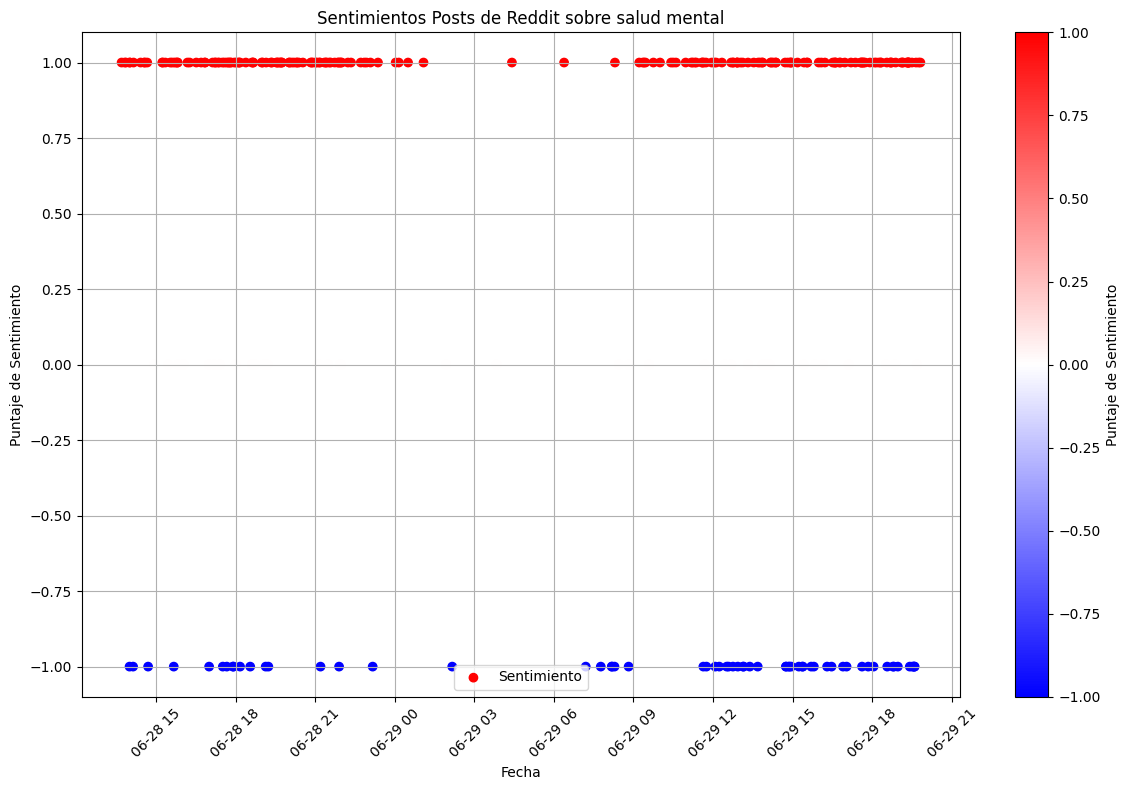

In [4]:
# Queremos saber la distribución de sentimientos una vez identificados (se identificaron previamente usando OPENAI)
# Para explorarlo voy a visualizar de manera inicial los datos usando la librería matplotlib y varias de sus funciones,
# en este caso, quiero realizar un gráfico de dispersión para ver su distribución según fecha

import matplotlib.pyplot as plt  # Importo la librería para visualización de gráficos

# Convertir 'date_utc' a datetime si no se ha hecho ya
df['date'] = pd.to_datetime(df['date'])  # Esto permite que matplotlib interprete correctamente las fechas en el eje X

# Creamo un gráfico de puntos (scatter plot) para visualizar los puntajes de sentimientos
plt.figure(figsize=(12, 8))  # Defino el tamaño del gráfico

# Visualizamos cada post como un punto, donde:
# - el eje X representa la fecha,
# - el eje Y representa el puntaje de sentimiento,
# - y el color representa el valor del sentimiento (más rojo = positivo, más azul = negativo)
plt.scatter(df['date'], df['sentiment_score'], c=df['sentiment_score'], cmap='bwr', label='Sentimiento')

# Añade una barra de color para interpretar los puntajes
plt.colorbar(label='Puntaje de Sentimiento')

# Etiquetas de los ejes
plt.xlabel('Fecha')
plt.ylabel('Puntaje de Sentimiento')

# Título del gráfico
plt.title('Sentimientos Posts de Reddit sobre salud mental')

# Rotación de fechas para que no se encimen
plt.xticks(rotation=45)

# Agregamos una grilla para mejor legibilidad
plt.grid(True)

# Agregamos una leyenda para el gráfico
plt.legend()

# Ajusto el diseño automáticamente para evitar superposición de elementos
plt.tight_layout()

# Mostrar el gráfico final
plt.show()

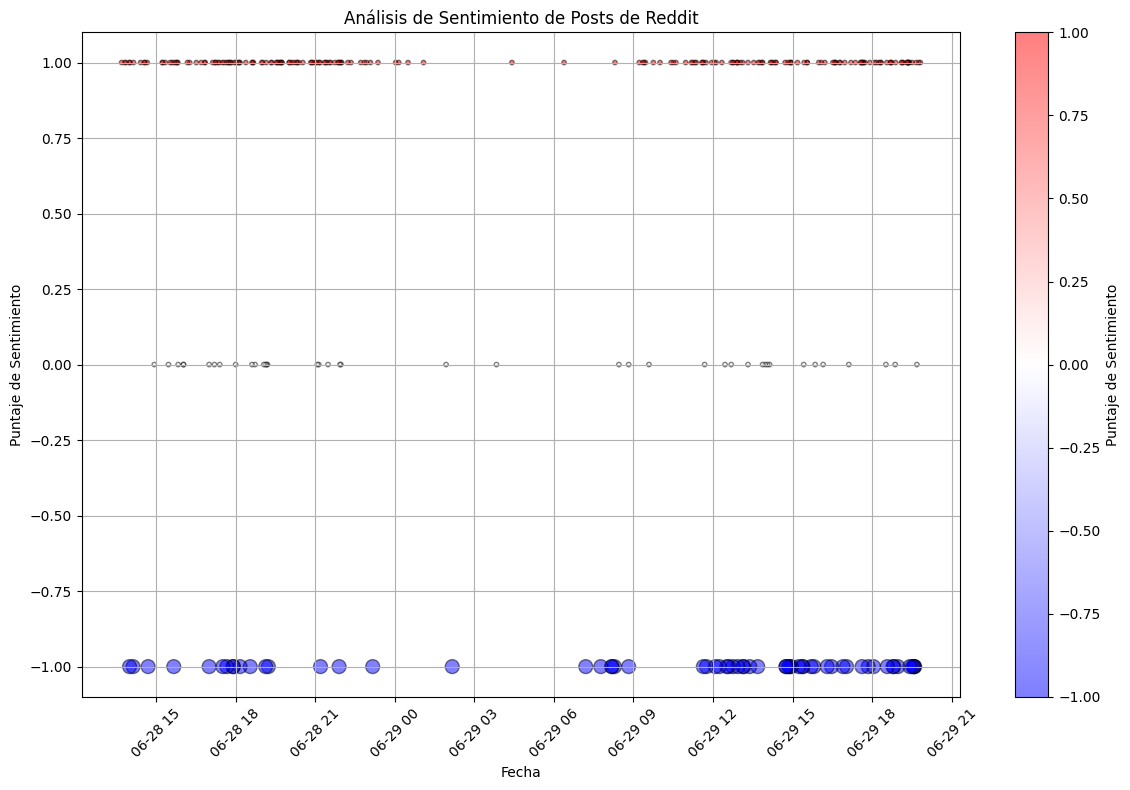

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Suponiendo que df es tu DataFrame y ya contiene las columnas necesarias
df['date'] = pd.to_datetime(df['date'])

# Calcular tamaños basados en el valor del sentimiento
sizes = np.where(df['sentiment_score'] == -1, 100, 10)  # 100 para -1, 10 para otros

# Creamos una figura de tamaño grande para visualizar mejor
plt.figure(figsize=(12, 8))

# Dibujamos un gráfico de dispersión donde el color representa el puntaje de sentimiento
scatter = plt.scatter(
    df['date'],  # Eje X: la fecha del comentario
    df['sentiment_score'],  # Eje Y: el puntaje de sentimiento
    c=df['sentiment_score'],  # Color de los puntos basado en el sentimiento
    s=sizes,  # Tamaño de los puntos según la condición anterior
    cmap='bwr',  # Usamos un mapa de colores de azul a rojo (blue-white-red)
    edgecolors='k',  # Bordes negros para dar más contraste a los puntos
    alpha=0.5  # Semi-transparencia para que se vea la densidad si se superponen
)

plt.colorbar(scatter, label='Puntaje de Sentimiento')  # Agregamos una barra de colores como leyenda
plt.xlabel('Fecha')  # Etiqueta del eje X
plt.ylabel('Puntaje de Sentimiento')  # Etiqueta del eje Y
plt.title('Análisis de Sentimiento de Posts de Reddit')  # Título del gráfico

plt.xticks(rotation=45)  # Rotamos las etiquetas del eje X para que no se sobrepongan
plt.grid(True)  # Activamos la cuadrícula para facilitar la lectura
plt.tight_layout()  # Ajustamos los márgenes automáticamente
plt.show()  # Mostramos el gráfico final

In [7]:
# Vamos a comenzar un análisis más detallado del lenguaje utilizado en los comentarios con sentimiento negativo.
# Para esto, necesitamos eliminar las "stopwords", que son palabras muy comunes como "el", "la", "y", "pero", etc.
# Estas palabras no nos dan mucha información útil por sí solas y podrían distorsionar los resultados al analizar frecuencia o temas.



# Importamos el módulo de "stopwords" (palabras vacías) desde la librería NLTK
!pip install nltk
from nltk.corpus import stopwords

In [10]:
# Puedes agregar manualmente algunas adicionales si quieres, me basé en un repositorio con palabras vacías en español de github https://github.com/Alir3z4/stop-words/blob/master/spanish.txt

spanish_stopwords = {
    "la", "ja", "opción", "opcion", "Hola", "ver",
    "forma", "iba", "pm", "hace", "sido", "va",
    'a',
    'actualmente',
    'adelante',
    'además',
    'afirmó',
    'agregó',
    'ahora',
    'ahí',
    'al',
    'algo',
    'alguna',
    'algunas',
    'alguno',
    'algunos',
    'algún',
    'alrededor',
    'ambos',
    'ampleamos',
    'ante',
    'anterior',
    'antes',
    'apenas',
    'aproximadamente',
    'aquel',
    'aquellas',
    'aquellos',
    'aqui',
    'aquí',
    'arriba',
    'aseguró',
    'así',
    'atras',
    'aunque',
    'ayer',
    'añadió',
    'aún',
    'bajo',
    'bastante',
    'bien',
    'buen',
    'buena',
    'buenas',
    'bueno',
    'buenos',
    'cada',
    'casi',
    'cerca',
    'cierta',
    'ciertas',
    'cierto',
    'ciertos',
    'cinco',
    'comentó',
    'como',
    'con',
    'conocer',
    'conseguimos',
    'conseguir',
    'considera',
    'consideró',
    'consigo',
    'consigue',
    'consiguen',
    'consigues',
    'contra',
    'cosas',
    'creo',
    'cual',
    'cuales',
    'cualquier',
    'cuando',
    'cuanto',
    'cuatro',
    'cuenta',
    'cómo',
    'da',
    'dado',
    'dan',
    'dar',
    'de',
    'debe',
    'deben',
    'debido',
    'decir',
    'dejó',
    'del',
    'demás',
    'dentro',
    'desde',
    'después',
    'dice',
    'dicen',
    'dicho',
    'dieron',
    'diferente',
    'diferentes',
    'dijeron',
    'dijo',
    'dio',
    'donde',
    'dos',
    'durante',
    'e',
    'ejemplo',
    'el',
    'ella',
    'ellas',
    'ello',
    'ellos',
    'embargo',
    'empleais',
    'emplean',
    'emplear',
    'empleas',
    'empleo',
    'en',
    'encima',
    'encuentra',
    'entonces',
    'entre',
    'era',
    'erais',
    'eramos',
    'eran',
    'eras',
    'eres',
    'es',
    'esa',
    'esas',
    'ese',
    'eso',
    'esos',
    'esta',
    'estaba',
    'estabais',
    'estaban',
    'estabas',
    'estad',
    'estada',
    'estadas',
    'estado',
    'estados',
    'estais',
    'estamos',
    'estan',
    'estando',
    'estar',
    'estaremos',
    'estará',
    'estarán',
    'estarás',
    'estaré',
    'estaréis',
    'estaría',
    'estaríais',
    'estaríamos',
    'estarían',
    'estarías',
    'estas',
    'este',
    'estemos',
    'esto',
    'estos',
    'estoy',
    'estuve',
    'estuviera',
    'estuvierais',
    'estuvieran',
    'estuvieras',
    'estuvieron',
    'estuviese',
    'estuvieseis',
    'estuviesen',
    'estuvieses',
    'estuvimos',
    'estuviste',
    'estuvisteis',
    'estuviéramos',
    'estuviésemos',
    'estuvo',
    'está',
    'estábamos',
    'estáis',
    'están',
    'estás',
    'esté',
    'estéis',
    'estén',
    'estés',
    'ex',
    'existe',
    'existen',
    'explicó',
    'expresó',
    'fin',
    'fue',
    'fuera',
    'fuerais',
    'fueran',
    'fueras',
    'fueron',
    'fuese',
    'fueseis',
    'fuesen',
    'fueses',
    'fui',
    'fuimos',
    'fuiste',
    'fuisteis',
    'fuéramos',
    'fuésemos',
    'gran',
    'grandes',
    'gueno',
    'ha',
    'haber',
    'habida',
    'habidas',
    'habido',
    'habidos',
    'habiendo',
    'habremos',
    'habrá',
    'habrán',
    'habrás',
    'habré',
    'habréis',
    'habría',
    'habríais',
    'habríamos',
    'habrían',
    'habrías',
    'habéis',
    'había',
    'habíais',
    'habíamos',
    'habían',
    'habías',
    'hace',
    'haceis',
    'hacemos',
    'hacen',
    'hacer',
    'hacerlo',
    'haces',
    'hacia',
    'haciendo',
    'hago',
    'han',
    'has',
    'hasta',
    'hay',
    'haya',
    'hayamos',
    'hayan',
    'hayas',
    'hayáis',
    'he',
    'hecho',
    'hemos',
    'hicieron',
    'hizo',
    'hoy',
    'hube',
    'hubiera',
    'hubierais',
    'hubieran',
    'hubieras',
    'hubieron',
    'hubiese',
    'hubieseis',
    'hubiesen',
    'hubieses',
    'hubimos',
    'hubiste',
    'hubisteis',
    'hubiéramos',
    'hubiésemos',
    'hubo',
    'igual',
    'incluso',
    'indicó',
    'informó',
    'intenta',
    'intentais',
    'intentamos',
    'intentan',
    'intentar',
    'intentas',
    'intento',
    'ir',
    'junto',
    'la',
    'lado',
    'largo',
    'las',
    'le',
    'les',
    'llegó',
    'lleva',
    'llevar',
    'lo',
    'los',
    'luego',
    'lugar',
    'manera',
    'manifestó',
    'mayor',
    'me',
    'mediante',
    'mejor',
    'mencionó',
    'menos',
    'mi',
    'mientras',
    'mio',
    'mis',
    'misma',
    'mismas',
    'mismo',
    'mismos',
    'modo',
    'momento',
    'mucha',
    'muchas',
    'mucho',
    'muchos',
    'muy',
    'más',
    'mí',
    'mía',
    'mías',
    'mío',
    'míos',
    'nada',
    'nadie',
    'ni',
    'ninguna',
    'ningunas',
    'ninguno',
    'ningunos',
    'ningún',
    'no',
    'nos',
    'nosotras',
    'nosotros',
    'nuestra',
    'nuestras',
    'nuestro',
    'nuestros',
    'nueva',
    'nuevas',
    'nuevo',
    'nuevos',
    'nunca',
    'o',
    'ocho',
    'os',
    'otra',
    'otras',
    'otro',
    'otros',
    'para',
    'parece',
    'parte',
    'partir',
    'pasada',
    'pasado',
    'pero',
    'pesar',
    'poca',
    'pocas',
    'poco',
    'pocos',
    'podeis',
    'podemos',
    'poder',
    'podria',
    'podriais',
    'podriamos',
    'podrian',
    'podrias',
    'podrá',
    'podrán',
    'podría',
    'podrían',
    'poner',
    'por',
    'por qué',
    'porque',
    'posible',
    'primer',
    'primera',
    'primero',
    'primeros',
    'principalmente',
    'propia',
    'propias',
    'propio',
    'propios',
    'próximo',
    'próximos',
    'pudo',
    'pueda',
    'puede',
    'pueden',
    'puedo',
    'pues',
    'que',
    'quedó',
    'queremos',
    'quien',
    'quienes',
    'quiere',
    'quién',
    'qué',
    'realizado',
    'realizar',
    'realizó',
    'respecto',
    'sabe',
    'sabeis',
    'sabemos',
    'saben',
    'saber',
    'sabes',
    'se',
    'sea',
    'seamos',
    'sean',
    'seas',
    'segunda',
    'segundo',
    'según',
    'seis',
    'ser',
    'seremos',
    'será',
    'serán',
    'serás',
    'seré',
    'seréis',
    'sería',
    'seríais',
    'seríamos',
    'serían',
    'serías',
    'seáis',
    'señaló',
    'si',
    'sido',
    'siempre',
    'siendo',
    'siete',
    'sigue',
    'siguiente',
    'sin',
    'sino',
    'sobre',
    'sois',
    'sola',
    'solamente',
    'solas',
    'solo',
    'solos',
    'somos',
    'son',
    'soy',
    'su',
    'sus',
    'suya',
    'suyas',
    'suyo',
    'suyos',
    'sí',
    'sólo',
    'tal',
    'también',
    'tampoco',
    'tan',
    'tanto',
    'te',
    'tendremos',
    'tendrá',
    'tendrán',
    'tendrás',
    'tendré',
    'tendréis',
    'tendría',
    'tendríais',
    'tendríamos',
    'tendrían',
    'tendrías',
    'tened',
    'teneis',
    'tenemos',
    'tener',
    'tenga',
    'tengamos',
    'tengan',
    'tengas',
    'tengo',
    'tengáis',
    'tenida',
    'tenidas',
    'tenido',
    'tenidos',
    'teniendo',
    'tenéis',
    'tenía',
    'teníais',
    'teníamos',
    'tenían',
    'tenías',
    'tercera',
    'ti',
    'tiempo',
    'tiene',
    'tienen',
    'tienes',
    'toda',
    'todas',
    'todavía',
    'todo',
    'todos',
    'total',
    'trabaja',
    'trabajais',
    'trabajamos',
    'trabajan',
    'trabajar',
    'trabajas',
    'trabajo',
    'tras',
    'trata',
    'través',
    'tres',
    'tu',
    'tus',
    'tuve',
    'tuviera',
    'tuvierais',
    'tuvieran',
    'tuvieras',
    'tuvieron',
    'tuviese',
    'tuvieseis',
    'tuviesen',
    'tuvieses',
    'tuvimos',
    'tuviste',
    'tuvisteis',
    'tuviéramos',
    'tuviésemos',
    'tuvo',
    'tuya',
    'tuyas',
    'tuyo',
    'tuyos',
    'tú',
    'ultimo',
    'un',
    'una',
    'unas',
    'uno',
    'unos',
    'usa',
    'usais',
    'usamos',
    'usan',
    'usar',
    'usas',
    'uso',
    'usted',
    'va',
    'vais',
    'valor',
    'vamos',
    'van',
    'varias',
    'varios',
    'vaya',
    'veces',
    'ver',
    'verdad',
    'verdadera',
    'verdadero',
    'vez',
    'vosotras',
    'vosotros',
    'voy',
    'vuestra',
    'vuestras',
    'vuestro',
    'vuestros',
    'y',
    'ya',
    'yo',
    'él',
    'éramos',
    'ésta',
    'éstas',
    'éste',
    'éstos',
    'última',
    'últimas',
    'último',
    'últimos',
    'ahi',
    'n',
    'voy',
    'm',
    'mas',
    'ja',
    'q'
}



#Análisis exploratorio: Nube de palabras

En esta sección vamos a generar una nube de palabras como forma de "lectura lejana" (distant reading), lo cual nos permite identificar las tendencias generales del contenido textual sin centrarnos en casos individuales.

A través de la visualización de las palabras más frecuentes en los comentarios negativos, buscamos capturar temas recurrentes, términos clave y patrones de uso del lenguaje que puedan orientar un análisis más cualitativo posterior.




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


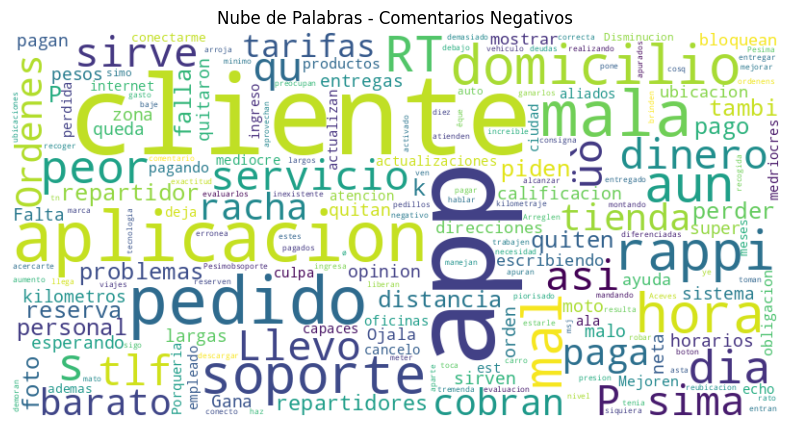

In [11]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')

# Filtrar comentarios negativos
negative_comments = df[df['sentiment_score'] == -1]['text']

# Combinar todos los comentarios negativos en una sola cadena de texto
all_negative_text = ' '.join(negative_comments)

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=spanish_stopwords).generate(all_negative_text)


# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras - Comentarios Negativos')
plt.show()


#Análisis crítico: Visualización de palabras frecuentes y frases asociadas en comentarios negativos

En esta sección realizamos una exploración interactiva de los comentarios negativos identificados por el modelo de sentimiento. A diferencia de una nube de palabras estática, esta visualización permite no solo observar las palabras más frecuentes, sino también acceder a fragmentos de texto donde dichas palabras aparecen, ofreciendo un puente entre el análisis cuantitativo y cualitativo.

Este enfoque combina técnicas de conteo de frecuencias con una interfaz visual que facilita una lectura más contextualizada: al pasar el cursor por cada término, se despliegan frases reales extraídas de los comentarios, lo que permite reconocer cómo se usan esas palabras y en qué tipos de quejas, emociones o experiencias están incrustadas.

La interactividad habilita una lectura “semi-cercana", útil para detectar ambigüedades, ironías o sentidos comunes que no se capturan en métricas simples. Así, esta herramienta no solo señala qué términos aparecen más, sino también cómo circulan discursivamente en el universo negativo del dataset, abriendo camino para interpretaciones más profundas.


In [12]:
!pip install nltk plotly

In [24]:
from collections import Counter # Importamos Counter para contar la frecuencia de palabras
import re # Importamos expresiones regulares para limpiar y extraer palabras del texto
import plotly.express as px # Importamos Plotly Express para hacer visualizaciones interactivas
from tqdm.notebook import tqdm  # Importamos tqdm para ver una barra de progreso durante el procesamiento

**¿Qué queremos observar con el siguiente código?**

Nuestro objetivo es identificar los términos más frecuentes en los comentarios negativos y entender cómo cambian esos términos a lo largo del tiempo.
Al visualizar esto de forma dinámica, podemos detectar momentos clave, como picos de insatisfacción, cambios en el lenguaje o crisis específicas (por ejemplo, un día con muchas menciones a "bloqueo", "aplicación", "pago", etc.).

In [25]:
# Convertir fecha
df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].dt.date  # usa solo la fecha para animación

# Stopwords en español
stop_words = set(stopwords.words('spanish'))


# Filtramos los comentarios que tienen un sentimiento negativo
df_neg = df[df['sentiment_score'] == -1].copy()  # Creamos un nuevo DataFrame solo con comentarios negativos
df_neg['text'] = df_neg['text'].astype(str)  # Nos aseguramos de que la columna de texto sea tipo string

# Creamos una lista vacía donde vamos a guardar las palabras frecuentes por cada fecha
word_date_rows = []

# Recorremos los comentarios negativos agrupados por fecha
for fecha, grupo in tqdm(df_neg.groupby('date')):  # Usamos tqdm para ver el progreso mientras se ejecuta
    full_text = ' '.join(grupo['text'])  # Unimos todos los textos de ese día en un solo string
    words = re.findall(r'\b\w+\b', full_text.lower())  # Extraemos todas las palabras en minúsculas, ignorando puntuación
    clean_words = [w for w in words if w not in stop_words and len(w) > 2]  # Filtramos stopwords y palabras muy cortas
    counts = Counter(clean_words).most_common(30)  # Obtenemos las 30 palabras más frecuentes de ese día

    # Guardamos los resultados en una lista como diccionarios
    for word, count in counts:
        word_date_rows.append({'date': str(fecha), 'word': word, 'count': count})

# Convertimos la lista en un DataFrame para visualizarlo
words_df = pd.DataFrame(word_date_rows)

# Visualizamos con Plotly Express usando una animación
fig = px.scatter(
    words_df,  # Nuestro DataFrame con palabras por fecha
    x="word",  # Eje X: palabra (no importa la posición, es solo para mostrar)
    y="count",  # Eje Y: frecuencia de la palabra
    size="count",  # Tamaño del punto según cuántas veces aparece la palabra
    color="count",  # Color también según la frecuencia
    animation_frame="date",  # Creamos una animación por día
    text="word",  # Mostramos la palabra en cada punto
    size_max=60,
    color_continuous_scale="Purples",  # Elegimos una paleta de color
    title="🌪️ Palabras más frecuentes en comentarios negativos por fecha"
)

# Ajustes estéticos del gráfico
fig.update_traces(textposition='top center')
fig.update_layout(
    showlegend=False,  # No mostramos leyenda
    xaxis=dict(showticklabels=False),  # Ocultamos etiquetas del eje X
    yaxis_title='Frecuencia',
    margin=dict(t=60, l=40, r=40, b=40),
    plot_bgcolor='white',
    title_font=dict(size=20),
    height=600
)

# Indicamos cómo queremos que se muestre el gráfico en el entorno
import plotly.io as pio
pio.renderers.default = 'iframe_connected'  # Esto asegura que la animación se muestre correctamente en Colab o Jupyter


  0%|          | 0/2 [00:00<?, ?it/s]

In [26]:
# Ordenar dentro de cada fecha por frecuencia
words_df['rank'] = words_df.groupby('date')['count'].rank(method='first', ascending=False)
words_df = words_df[words_df['rank'] <= 15]  # solo top 15 palabras por fecha

**¿Qué queremos observar con este código?**


Queremos refinar aún más nuestro análisis de sentimientos negativos en plataformas como Rappi, focalizándonos en las palabras más frecuentes. Pero además de filtrar las palabras vacías, ahora queremos organizarlas por ranking para compararlas de manera más estructurada en una animación por días. Así detectamos patrones de cambio en el lenguaje usado por los repartidores para expresar malestar.

In [29]:
import plotly.express as px  # Volvemos a importar Plotly Express para crear visualizaciones interactivas

# Paso 1: definimos las palabras que queremos eliminar del gráfico
# Estas palabras son comunes en español y no nos aportan significado analítico ("palabras vacías")
spanish_stopwords = set(spanish_stopwords)  # Nos aseguramos de que sea un conjunto (para búsquedas más rápidas)

# Paso 2: filtramos nuestro DataFrame para eliminar esas palabras vacías
filtered_df = words_df[~words_df['word'].isin(spanish_stopwords)]  # Nos quedamos solo con palabras que NO están en stopwords

# Paso 3: graficamos solo las palabras filtradas
fig = px.scatter(
    filtered_df,  # Usamos el DataFrame filtrado
    x='rank',  # En el eje X usamos el ranking de la palabra (debería haberse definido previamente)
    y='count',  # En el eje Y va la frecuencia (cuántas veces se repitió)
    size='count',  # El tamaño del punto también se basa en la frecuencia
    color='count',  # Color según frecuencia (más oscuro = más frecuente)
    animation_frame='date',  # Creamos animaciones por fecha
    text='word',  # Mostramos la palabra dentro del punto
    size_max=60,
    color_continuous_scale='Purples',  # Paleta de colores morados para mantener consistencia visual
    title="Top palabras negativas por fecha (sin palabras comunes)"  # Título del gráfico
)

# Ajustes visuales adicionales
fig.update_traces(textposition='top center')  # Posicionamos el texto en la parte superior de cada punto
fig.update_layout(
    showlegend=False,  # No mostramos leyenda (ya se entiende con el color)
    xaxis=dict(title='Ranking de palabra', tickvals=list(range(1, 16))),  # Etiquetas del eje X como rangos del 1 al 15
    yaxis_title='Frecuencia',
    margin=dict(t=60, l=40, r=40, b=40),  # Márgenes del gráfico
    plot_bgcolor='white',  # Fondo blanco para mayor claridad
    title_font=dict(size=20),  # Tamaño de la fuente del título
    height=600  # Altura del gráfico
)

# Guardamos el gráfico como un archivo HTML para que pueda compartirse o visualizarse fuera del entorno de ejecución
fig.write_html("Ranking de palabras.html")

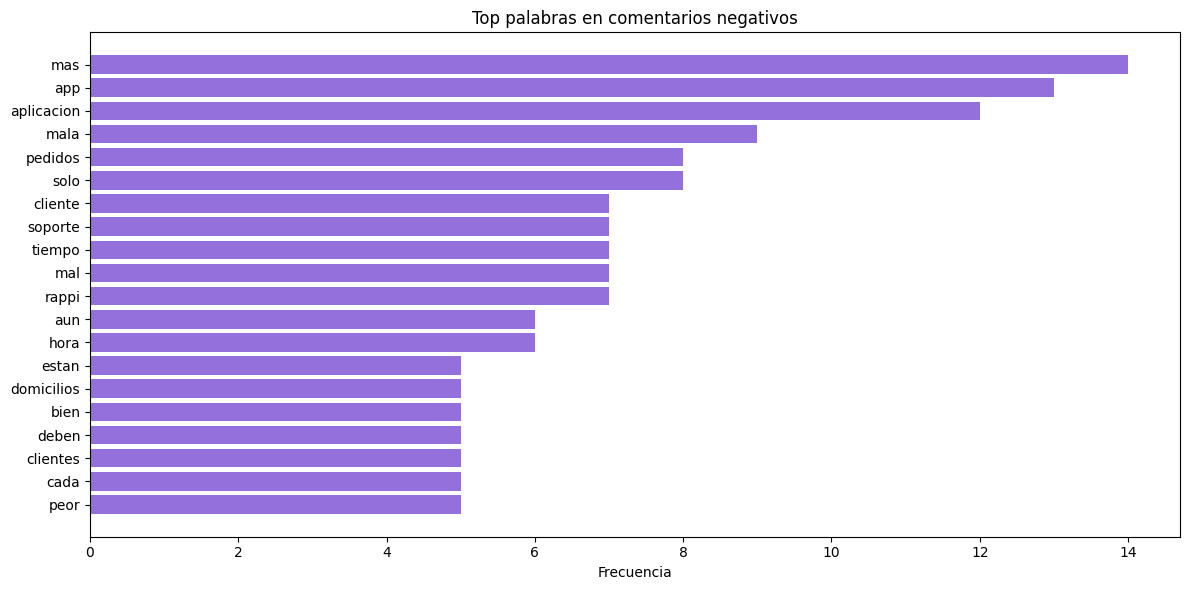

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from collections import Counter

# Paso 1: Filtrar solo comentarios negativos
df_neg = df[df['sentiment_score'] == -1].copy()
df_neg['text'] = df_neg['text'].astype(str)

# Paso 2: Unir todo el texto negativo
full_text = ' '.join(df_neg['text']).lower()

# Paso 3: Tokenizar y limpiar
words = re.findall(r'\b\w+\b', full_text)

# Paso 4: Eliminar stopwords
spanish_stopwords = set(spanish_stopwords)  # asegúrate de tener esta lista cargada
filtered_words = [w for w in words if w not in spanish_stopwords and len(w) > 2]

# Paso 5: Contar frecuencia
word_counts = Counter(filtered_words).most_common(20)  # top 20 palabras

# Paso 6: Preparar datos para graficar
words, counts = zip(*word_counts)

# Paso 7: Graficar
plt.figure(figsize=(12, 6))
plt.barh(words[::-1], counts[::-1], color='mediumpurple')  # gráfico horizontal invertido para mayor legibilidad
plt.title('Top palabras en comentarios negativos')
plt.xlabel('Frecuencia')
plt.tight_layout()
plt.show()

**¿Qué queremos observar con este código?**


Queremos refinar aún más nuestro análisis de sentimientos negativos en plataformas como Rappi, focalizándonos en las palabras más frecuentes. Pero además de filtrar las palabras vacías, ahora queremos organizarlas por ranking para compararlas de manera más estructurada en una animación por días. Así detectamos patrones de cambio en el lenguaje usado por los repartidores para expresar malestar.


In [32]:
from collections import defaultdict


# Paso 1: Filtrar comentarios negativos
df_neg = df[df['sentiment_score'] == -1].copy()
df_neg['text'] = df_neg['text'].astype(str)

# Paso 2: Asegurarse de que spanish_stopwords es un set (mejor rendimiento)
spanish_stopwords = set(spanish_stopwords)

In [33]:
# Paso 3: Extraer oraciones asociadas a palabras frecuentes
sentences_per_word = defaultdict(list)  # Creamos un diccionario para guardar frases por palabra

for comment in df_neg["text"]:  # Recorremos todos los comentarios negativos
    sentences = re.split(r'[.!?]+', comment)  # Dividimos cada comentario en oraciones
    for sentence in sentences:
        words = re.findall(r'\b\w+\b', sentence.lower())  # Extraemos palabras (ignoramos puntuación, pasamos a minúscula)
        for word in words:
            if word not in spanish_stopwords and len(word) > 2:  # Solo consideramos palabras útiles y con más de 2 letras
                sentences_per_word[word].append(sentence.strip())  # Guardamos la frase en la lista correspondiente a esa palabra


In [36]:
# Paso 4: Crear DataFrame con frecuencias y oraciones
rows = []
for word, sentences in sentences_per_word.items():
    freq = len(sentences)  # Contamos cuántas veces aparece cada palabra
    top_sentences = sorted(set(sentences), key=len, reverse=True)[:3]  # Seleccionamos hasta 3 frases únicas y representativas
    for sent in top_sentences:
        rows.append({"word": word, "count": freq, "sentence": sent})  # Guardamos palabra, frecuencia y oración asociada

In [35]:
df_words = pd.DataFrame(rows)  # Creamos el DataFrame final con toda la información estructurada

In [34]:
# Paso 5: Crear gráfico interactivo
fig = px.scatter(
    df_words,  # Usamos el DataFrame de palabras con sus frases
    x='word',  # Eje X: palabra
    y='count',  # Eje Y: frecuencia de aparición
    size='count',  # Tamaño del punto según frecuencia
    color='count',  # Color también basado en frecuencia
    hover_data=['sentence'],  # Al pasar el cursor, mostramos oraciones donde aparece la palabra
    title="🔍 Palabras frecuentes en comentarios negativos (hover para ver frases)",
    size_max=40,
    color_continuous_scale='Purples'
)


In [38]:
fig.update_traces(marker=dict(opacity=0.8), textposition='top center')  # Ajustes visuales: más transparencia, texto centrado

fig.update_layout(
    xaxis_title="Palabra",  # Etiqueta del eje X
    yaxis_title="Frecuencia",  # Etiqueta del eje Y
    height=600,  # Altura del gráfico
    plot_bgcolor='white'  # Fondo blanco para más claridad visual
)
fig.write_html("grafico_palabras_negativas.html")  # Guardamos el gráfico como archivo HTML para compartir o incrustar

##**PARTE 2: ANÁLISIS DE DOCUMENTOS: TÉRMINOS Y CONDICIONES RAPPI TENDEROS**

> Haremos análisis de contenido (análisis de discurso de este documento para entender la visión de la plataforma)



In [41]:
import requests
from bs4 import BeautifulSoup

# URL del documento legal
url = "https://legal.rappi.com.co/colombia/terminos-y-condiciones-de-uso-de-plataforma-virtual-rappitendero/"

# Obtener contenido HTML
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

# Extraer solo el texto visible (ignorar headers y navegación)
# Esto busca en el div principal del contenido legal
main_content = soup.find('main') or soup.body  # usa <main> si existe, si no el <body>
text = main_content.get_text(separator='\n', strip=True)

# Mostrar primeras líneas como verificación
print(text[:1000])  # puedes ajustar o quitar esta línea


Argentina
Brazil
Chile
Colombia
Costa Rica
Ecuador
Global
México
Perú
Uncategorized
Uruguay
Rappi, Inc.
Términos y Condiciones de Uso de la Aplicación “Soy Rappi”
CONSIDERACIONES GENERALES
RAPPI S.A.S. (en adelante, “Rappi”) es una sociedad constituida conforme a las leyes colombianas, identificada con NIT. 900.843.898-9, con domicilio en la ciudad de Bogotá D.C. Rappi es la operadora y administradora de la Aplicación “Soy Rappi” y la Plataforma Rappi en la República de Colombia.
El presente documento contiene los Términos y Condiciones de Uso de la Aplicación “Soy Rappi” (en adelante, “Términos y Condiciones”).
NATURALEZA
Los presentes Términos y Condiciones regulan la autorización de uso de la Aplicación “Soy Rappi” que otorga Rappi a los Repartidores Independientes.
DEFINICIONES
Para los efectos de los presentes Términos y Condiciones se entiende por:
Aliado Comercial
. Persona natural o jurídica que exhibe, ofrece y comercializa productos y/o servicios a través de la Plataforma Rap

In [42]:
import nltk
nltk.download('punkt', download_dir='/usr/local/nltk_data')  # descarga
nltk.data.path.append('/usr/local/nltk_data')                # fuerza el path correcto

[nltk_data] Downloading package punkt to /usr/local/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [43]:
with open("terminos_rappi.txt", "w", encoding="utf-8") as f:
    f.write(text)

In [44]:
from nltk import FreqDist

In [51]:
import re

# Definir las stopwords en español
spanish_stopwords = set(stopwords.words('spanish'))

# Tokenizar solo con expresiones regulares (sin puntuación, sin stopwords)
words = re.findall(r'\b\w+\b', text.lower())
filtered_words = [w for w in words if w not in spanish_stopwords and len(w) > 2]

<Figure size 1200x600 with 0 Axes>

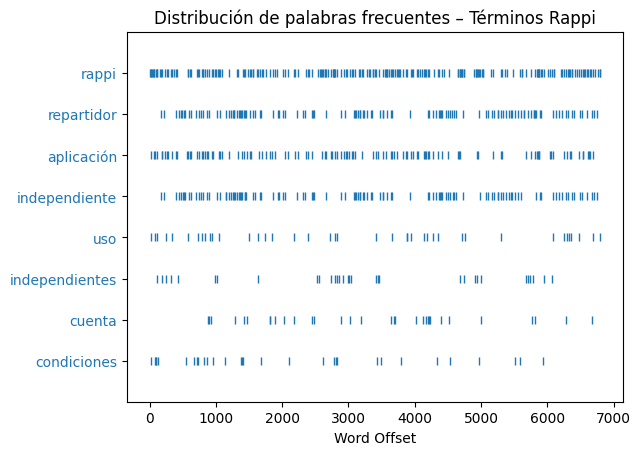

In [55]:
import nltk
import matplotlib.pyplot as plt
import re

# 1. Leer y limpiar el texto
with open("terminos_rappi.txt", "r", encoding="utf-8") as f:
    text = f.read().lower()

# 2. Tokenizar (simple con regex o nltk)
tokens = re.findall(r'\b\w+\b', text)

# 3. Convertir a objeto nltk.Text
text_obj = nltk.Text(tokens)

# 4. Seleccionar palabras clave (puedes usar las más frecuentes)
from collections import Counter

stopwords = set(nltk.corpus.stopwords.words('spanish'))
custom = {"rt", "https", "usuario", "pedido", "favor", "gracias", 'través'}
filtered = [w for w in tokens if w not in stopwords and w not in custom and len(w) > 2]
top_words = [w for w, _ in Counter(filtered).most_common(8)]  # elige 8 o menos

# 5. Graficar dispersión
plt.figure(figsize=(12, 6))
text_obj.dispersion_plot(top_words)
plt.title("Distribución de palabras frecuentes – Términos Rappi")
plt.show()

   independiente  repartidor  libre  autónoma  exclusividad
0              0           0      0         0             0
1              0           0      0         0             0
2              0           0      0         0             0
3              0           0      0         0             0
4              0           0      0         0             0


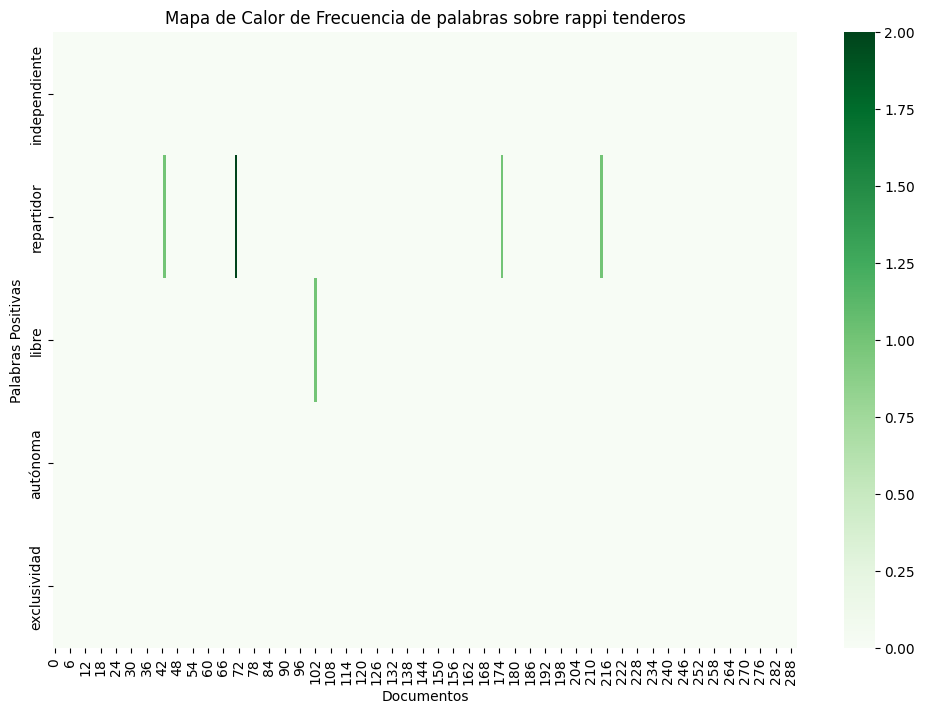

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Supongamos que df es tu DataFrame y 'text' es la columna de texto
# Reemplazar valores NaN con cadenas vacías
df['text'] = df['text'].fillna('')

# Normalización del texto: convertir a minúsculas y eliminar puntuación
df['clean_text'] = df['text'].str.lower().apply(lambda x: re.sub(r'\W+', ' ', x))

# Lista de palabras positivas para buscar en los textos
sustancias = ['independiente', 'repartidor', 'libre', 'autónoma', 'exclusividad']



# Función para contar palabras específicas en el texto
def count_specific_words(text, word_list):
    word_counts = {word: 0 for word in word_list}
    words = text.split()
    for word in words:
        if word in word_counts:
            word_counts[word] += 1
    return word_counts

# Crear una lista de diccionarios con los conteos de palabras positivas
word_counts_list = df['clean_text'].apply(lambda text: count_specific_words(text, sustancias)).tolist()

# Convertir la lista de diccionarios en un DataFrame
word_counts_df = pd.DataFrame(word_counts_list, index=df.index)

# Visualizar las primeras filas para verificar
print(word_counts_df.head())

# Crear un mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(word_counts_df.T, cmap='Greens', annot=False, cbar=True)
plt.title('Mapa de Calor de Frecuencia de palabras sobre rappi tenderos')
plt.xlabel('Documentos')
plt.ylabel('Palabras Positivas')
plt.show()